# 1. Data Preprocessing

In [ ]:
# load neccessarly libraries
import librosa.display
import matplotlib.pyplot as plt
import os, sys

# get working diroctory
sys.path.append(os.path.abspath('..'))

# get modelus
from scripts.cough_sound_processing import *
from scripts.feature_extraction import *

## 1.1 Cough sound Processing

In [2]:
# TB Negative Diroctory
neg_input_directory = '../data/tb_negative'
neg_output_directory = '../data/processed_data/tb_negative'
    
# Run the preprocessing on the directory of audio files.
preprocess_directory(neg_input_directory, neg_output_directory, target_sr=16000, lowcut=100, highcut=8000, trim_db=20)



Processing file: tb_neg (1).wav
Loaded ../data/tb_negative\tb_neg (1).wav with original sample rate: 44100 Hz
Resampled to 16000 Hz
Applied bandpass filtering
Normalized audio amplitude
Saved processed audio to: ../data/processed_data/tb_negative\tb_neg (1).wav


In [3]:
# TB Positive Diroctory
pos_input_directory = '../data/tb_positive'
pos_output_directory = '../data/processed_data/tb_positive'
    
# Run the preprocessing on the directory of audio files.
preprocess_directory(pos_input_directory, pos_output_directory, target_sr=16000, lowcut=100, highcut=8000, trim_db=20)


Processing file: tb_pos1 (1).wav
Loaded ../data/tb_positive\tb_pos1 (1).wav with original sample rate: 44100 Hz
Resampled to 16000 Hz
Applied bandpass filtering
Normalized audio amplitude
Saved processed audio to: ../data/processed_data/tb_positive\tb_pos1 (1).wav


## Feature Extraction 

### For TB Negative

In [4]:
# Path to a preprocessed audio file
neg_audio_file_path = '../data/processed_data/tb_negative/tb_neg (1).wav'
    
# Load the audio
neg_audio, neg_sr = librosa.load(neg_audio_file_path, sr=None)
print(f"Loaded {neg_audio_file_path} at {neg_sr} Hz")

# Extract features
neg_features = extract_features_from_audio(neg_audio, neg_sr)

# Print out the extracted features
print("Extracted Features:")
for key, value in neg_features.items():
    print(f"{key}: {value:.4f}")

Loaded ../data/processed_data/tb_negative/tb_neg (1).wav at 16000 Hz
Extracted Features:
rms_mean: 0.1107
rms_std: 0.0601
rms_skew: -0.3071
rms_kurtosis: -1.2952
zcr_mean: 0.2043
zcr_std: 0.1125
zcr_skew: 0.3149
zcr_kurtosis: -1.3255
spectral_centroid_mean: 3063.5632
spectral_centroid_std: 522.6942
spectral_centroid_skew: -0.5771
spectral_centroid_kurtosis: 0.4560
spectral_bandwidth_mean: 2514.3944
spectral_bandwidth_std: 136.1822
spectral_bandwidth_skew: -1.6692
spectral_bandwidth_kurtosis: 2.5705
spectral_rolloff_mean: 6553.4856
spectral_rolloff_std: 381.6375
spectral_rolloff_skew: -1.6914
spectral_rolloff_kurtosis: 2.6734
spectral_entropy_mean: 0.6512
spectral_entropy_std: 0.0905
spectral_entropy_skew: -0.3393
spectral_entropy_kurtosis: -1.1576
mfcc_1_mean: -130.5965
mfcc_1_std: 154.1059
mfcc_1_skew: -1.0451
mfcc_1_kurtosis: -0.1844
mfcc_2_mean: 42.3606
mfcc_2_std: 20.5914
mfcc_2_skew: 0.8980
mfcc_2_kurtosis: 0.5989
mfcc_3_mean: 21.5579
mfcc_3_std: 16.2126
mfcc_3_skew: 0.0810
mfcc_3

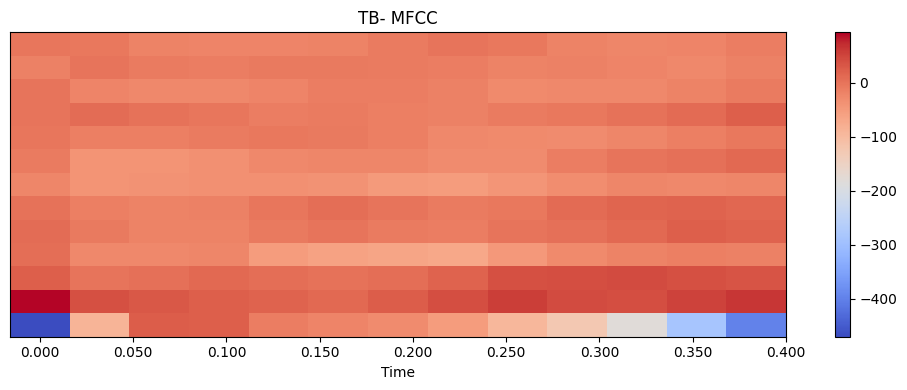

In [5]:
# Visualize the MFCCs for inspection
mfcc = librosa.feature.mfcc(y=neg_audio, sr=neg_sr, n_mfcc=13, n_fft=2048, hop_length=512)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=neg_sr, hop_length=512, x_axis='time')
plt.title('TB- MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()

In [6]:
# Path to a preprocessed audio file
pos_audio_file_path = '../data/processed_data/tb_positive/tb_pos1 (1).wav'
    
# Load the audio
pos_audio, pos_sr = librosa.load(pos_audio_file_path, sr=None)
print(f"Loaded {pos_audio_file_path} at {pos_sr} Hz")

# Extract features
pos_features = extract_features_from_audio(pos_audio, pos_sr)

# Print out the extracted features
print("Extracted Features:")
for key, value in pos_features.items():
    print(f"{key}: {value:.4f}")

Loaded ../data/processed_data/tb_positive/tb_pos1 (1).wav at 16000 Hz
Extracted Features:
rms_mean: 0.1181
rms_std: 0.0573
rms_skew: -0.6778
rms_kurtosis: -0.9875
zcr_mean: 0.1870
zcr_std: 0.0619
zcr_skew: -0.6703
zcr_kurtosis: -0.1273
spectral_centroid_mean: 3141.7515
spectral_centroid_std: 721.7883
spectral_centroid_skew: -0.7429
spectral_centroid_kurtosis: -0.4536
spectral_bandwidth_mean: 2485.9335
spectral_bandwidth_std: 287.7091
spectral_bandwidth_skew: -1.1497
spectral_bandwidth_kurtosis: -0.1758
spectral_rolloff_mean: 6554.6875
spectral_rolloff_std: 976.3789
spectral_rolloff_skew: -1.5306
spectral_rolloff_kurtosis: 0.5670
spectral_entropy_mean: 0.5908
spectral_entropy_std: 0.1468
spectral_entropy_skew: -0.3500
spectral_entropy_kurtosis: -1.5340
mfcc_1_mean: -109.5871
mfcc_1_std: 97.1618
mfcc_1_skew: -0.6307
mfcc_1_kurtosis: -0.8891
mfcc_2_mean: 42.1008
mfcc_2_std: 19.0768
mfcc_2_skew: 0.2782
mfcc_2_kurtosis: -1.1285
mfcc_3_mean: 23.2940
mfcc_3_std: 19.2363
mfcc_3_skew: -0.2293
m

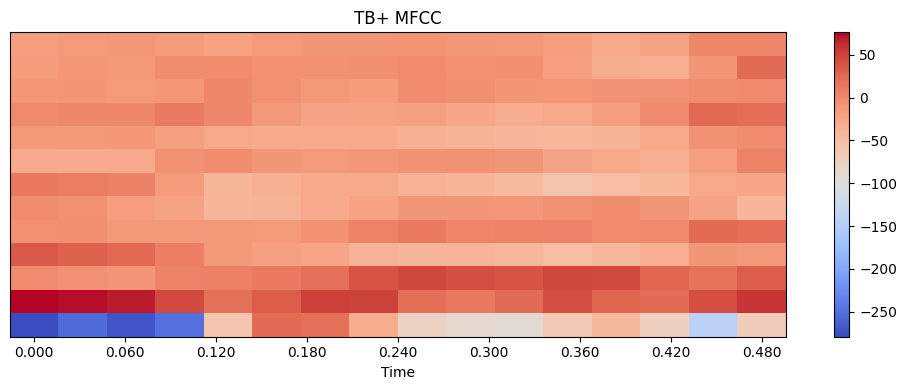

In [7]:
# Visualize the MFCCs for inspection
mfcc = librosa.feature.mfcc(y=pos_audio, sr=pos_sr, n_mfcc=13, n_fft=2048, hop_length=512)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=pos_sr, hop_length=512, x_axis='time')
plt.title('TB+ MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()